# 🐕‍🦺 End-to-End Dog Breed Classification


## 1. Objective
Identify the breed of dog through an image of a dog

## 2. Data
The dataset used can be obtained from kaggle by https://www.kaggle.com/catherinehorng/dogbreedidfromcomp/download

## 3. Output
Output will be a file with predictions probabilities for each dog



In [1]:
# Importing necessary libraries
import os
import torch
import torch.nn as nn
import torchvision

from torchinfo import summary
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

C:\Users\Piyush\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device 

'cuda'

## Getting Data Ready

We will access the data and labels

In [4]:
# Setting up all file directories
data_path = 'data/dog_breed'
train_dir = data_path+'/train'
test_dir = data_path+'/test'
labels_path = data_path+'/labels.csv'
labels = pd.read_csv(labels_path)


In [10]:
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [35]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


<Axes: >

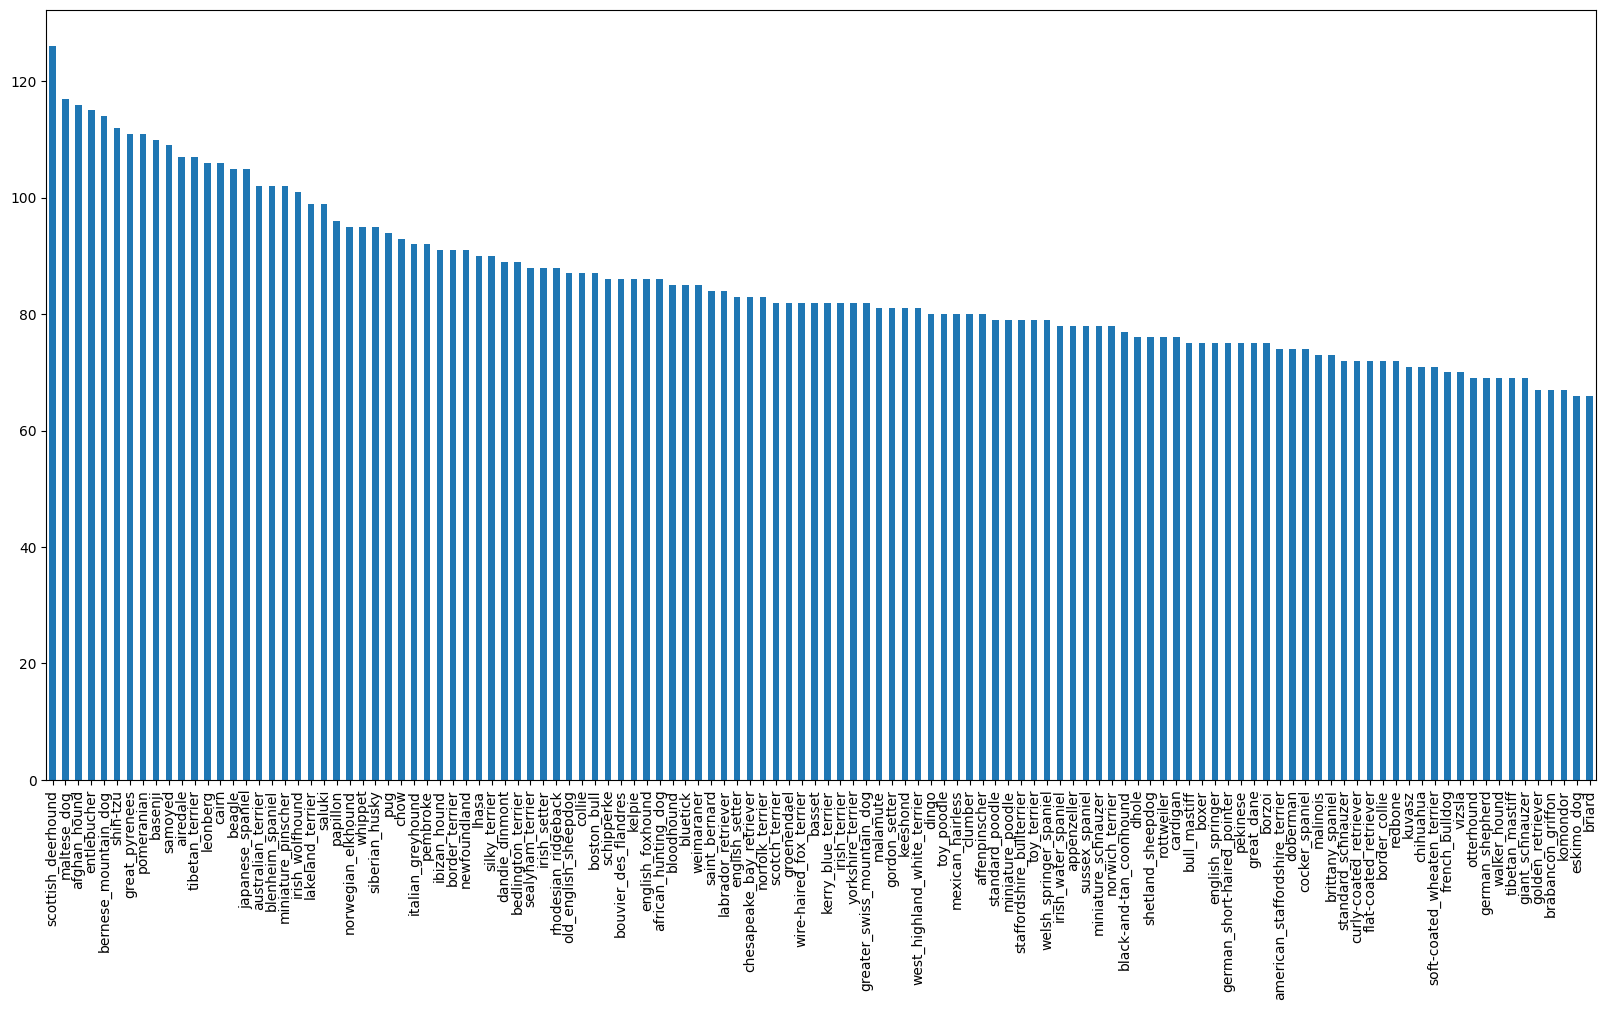

In [36]:
labels.breed.value_counts().plot.bar(figsize = (20,10))

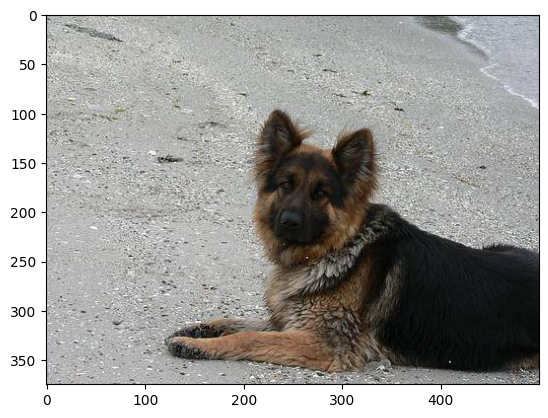

In [38]:
image_path = test_dir+'/00a3edd22dc7859c487a64777fc8d093.jpg'
image = Image.open(image_path)
plt.imshow(image)

In [39]:
# Checking duplicacy
labels.isna().sum(), len(labels)

(id       0
 breed    0
 dtype: int64,
 10222)

### Showing all dog breeds and their counts

In [41]:
# Counting the  number of same breeds images
breed_all = labels['breed']
breed_count =  breed_all.value_counts()
breed_count

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [29]:
# Access the list of class labels
class_labels = dataset.classes

# Print the class labels
print("Class labels:", class_labels)

Class labels: ['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_t

## Transform data to preffered folder sturcture

In [ ]:


# import os
# import shutil
# import pandas as pd

# # Function to create folders based on unique breeds
# def create_folders(labels_df):
#     unique_breeds = labels_df['breed'].unique()
#     for breed in unique_breeds:
#         os.makedirs(os.path.join(image_dir, breed), exist_ok=True)

# # Function to move images to their respective folders within the image directory
# def move_images(labels_df, image_dir):
#     for index, row in labels_df.iterrows():
#         image_id = row['id']
#         breed = row['breed']
#         image_filename = f"{image_id}.jpg"
#         source_path = os.path.join(image_dir, image_filename)
#         if os.path.exists(source_path):
#             dest_dir = os.path.join(image_dir, breed)
#             os.makedirs(dest_dir, exist_ok=True)  # Create destination directory if not exists
#             dest_path = os.path.join(dest_dir, image_filename)
#             shutil.move(source_path, dest_path)
#         else:
#             print(f"Image {image_filename} not found in {image_dir}. Skipping...")



# if __name__ == "__main__":
#     # Specify the path to the labels CSV file and the directory containing images
    
#     image_dir = train_dir

#     # Read labels CSV file
    

#     # Create folders based on unique breeds
#     create_folders(labels)

#     # Move images to their respective folders
#     move_images(labels, image_dir)


In [11]:
# Create datasets
dataset = datasets.ImageFolder(root=train_dir, transform=effnetb0_transforms)

# Define batch size for DataLoader
batch_size = 16


# Define the sizes of train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Split the dataset into train and test sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader instances for train and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Now we will prepare efficientnet b0 for transfer learning ,  we will change it's classifier and update it's output to len(dataset.classes) or 120 

In [9]:
effnetb0_weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT

effnetb0_transforms = effnetb0_weights.transforms()

effnetb0 = torchvision.models.efficientnet_b0(weights=effnetb0_weights)

for param in effnetb0.parameters():
    param.require_grad=False

In [10]:
effnetb0.classifer = nn.Sequential(
        nn.Dropout(p = 0.3, inplace = True),
        nn.Linear(in_features=1280, out_features=120)
)

In [12]:
optimizer = torch.optim.Adam(params=effnetb0.parameters(),
                            lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [13]:
from tqdm.auto import tqdm
def train_step(model:torch.nn.Module , dataloader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    
    model.train()
    
    train_loss , train_acc = 0,0
    
    for batch , (X,y) in tqdm(enumerate(dataloader)):
        if X is None or y is None:
            continue  # Skip this iteration if either image or label is None
        X = X.to(device)
        y = y.to(device)
        
        y_pred = model(X)
        loss = loss_fn(y_pred , y)
        
        train_loss +=loss.item()
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred , dim=1) , dim=1)
        train_acc+=(y_pred_class == y).sum().item()/len(y_pred)
        
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)
    return train_loss , train_acc

In [14]:
def test_step(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module):
    model.eval()
    test_loss , test_acc = 0,0
    
    with torch.inference_mode():
        for batch , (X, y) in tqdm(enumerate(dataloader)):
            if X is None or y is None:
                continue
            X = X.to(device) 
            y = y.to(device)
            
            test_pred_logits = model(X)
            
            loss = loss_fn(test_pred_logits , y)
            test_loss+=loss.item()
            
            test_pred_labels= test_pred_logits.argmax(dim=1)
            test_acc+=((test_pred_labels==y).sum().item()/len(test_pred_labels))
    
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss , test_acc

In [15]:
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
   
    model.to(device)
    results = {
        "train_loss":[],
        "train_acc":[],
        "test_loss":[],
        "test_acc":[]
    }
    
    for epoch in tqdm (range(epochs)):
        train_loss , train_acc = train_step(model= model,
                                           dataloader = train_dataloader,
                                           loss_fn = loss_fn, 
                                           optimizer = optimizer)
        test_loss , test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        print(f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}")
        
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results

In [16]:
# Start the timer
from timeit import default_timer as timer 
start_time = timer()
model_results = train(model=effnetb0,
                     train_dataloader=train_loader,
                     test_dataloader=test_loader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs= 5)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 1 | train_loss: 2.8329 | train_acc: 0.3254 | test_loss: 1.7352 | test_acc: 0.5217


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 2 | train_loss: 1.5027 | train_acc: 0.5693 | test_loss: 1.5530 | test_acc: 0.5804


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 3 | train_loss: 1.0620 | train_acc: 0.6875 | test_loss: 1.4448 | test_acc: 0.6097


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 4 | train_loss: 0.7645 | train_acc: 0.7670 | test_loss: 1.6069 | test_acc: 0.6013


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 5 | train_loss: 0.6899 | train_acc: 0.7849 | test_loss: 1.7792 | test_acc: 0.5834
Total training time: 720.486 seconds


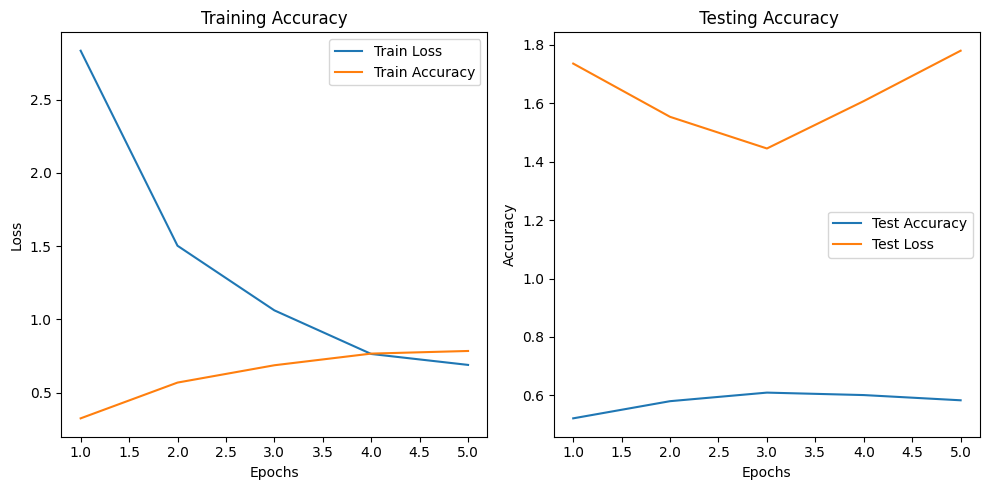

In [45]:
def plot_graphs(results):
    epochs = len(results["train_loss"])
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), results["train_loss"], label="Train Loss")
    plt.plot(range(1, epochs + 1), results["train_acc"], label="Train Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), results["test_acc"], label="Test Accuracy")
    plt.plot(range(1, epochs + 1), results["test_loss"], label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(" Testing Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_graphs(model_results)


In [21]:
torch.save(effnetb0.state_dict(),'efficientnet_b0_dog_classifier.pth')

### Making prediction on a sample image

Predicted class index: 6
Predicted class label :  australian_terrier


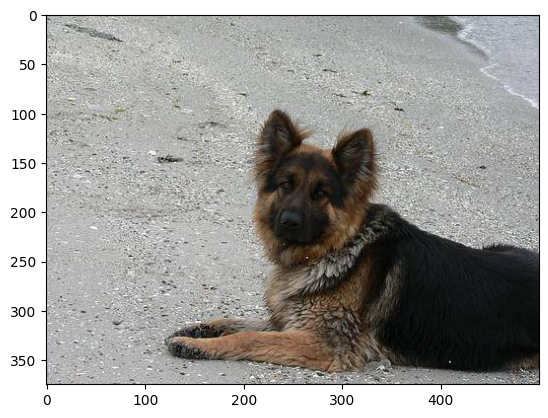

In [30]:
effnetb0.to('cpu')
image_path = test_dir+'/00a3edd22dc7859c487a64777fc8d093.jpg'
image = Image.open(image_path)
input_image = effnetb0_transforms(image).unsqueeze(0)
# model = torch.load('efficientnet_b0_dog_classifier.pth')
# model.eval()
# Perform inference
with torch.no_grad():
    output = effnetb0(input_image)

# Get predicted class
predicted_class = torch.argmax(output).item()
plt.imshow(image)
# Print the predicted class
print("Predicted class index:", predicted_class)
print("Predicted class label : ",dataset.classes[predicted_class])

### Randomly select and predict 5 images from test directory

Predicted class index: 6
Predicted class label :  australian_terrier


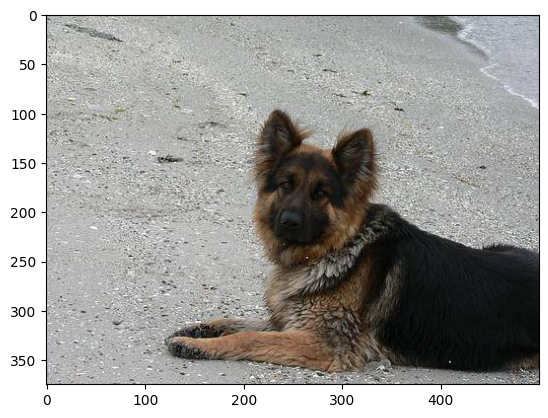

In [48]:
effnetb0.to('cpu')
image_path = test_dir+'/00a3edd22dc7859c487a64777fc8d093.jpg'
image = Image.open(image_path)
input_image = effnetb0_transforms(image).unsqueeze(0)
# model = torch.load('efficientnet_b0_dog_classifier.pth')
effnetb0.load_state_dict(torch.load('efficientnet_b0_dog_classifier.pth'))
effnetb0.eval()
# Perform inference
with torch.no_grad():
    output = effnetb0(input_image)

# Get predicted class
predicted_class = torch.argmax(output).item()
plt.imshow(image)
# Print the predicted class
print("Predicted class index:", predicted_class)
print("Predicted class label : ",dataset.classes[predicted_class])

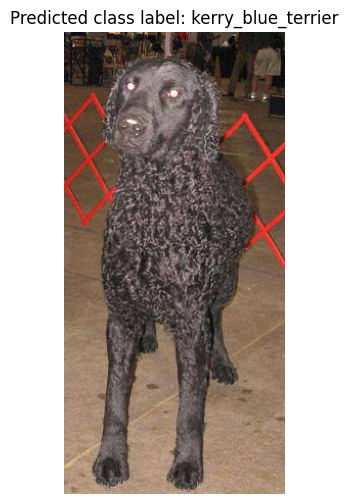

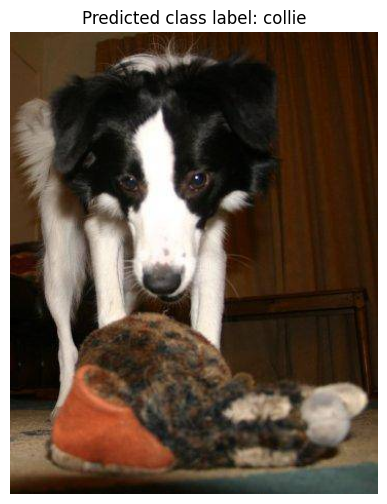

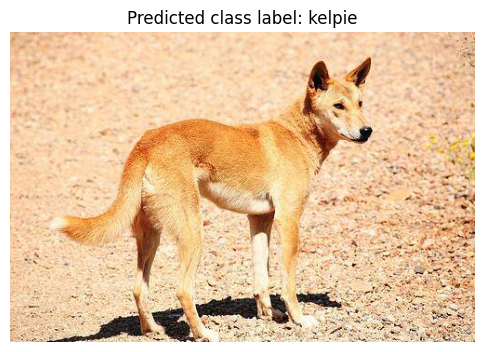

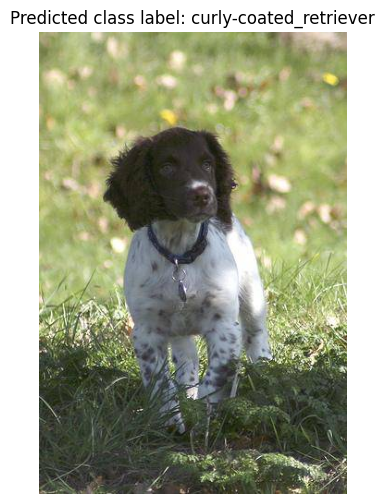

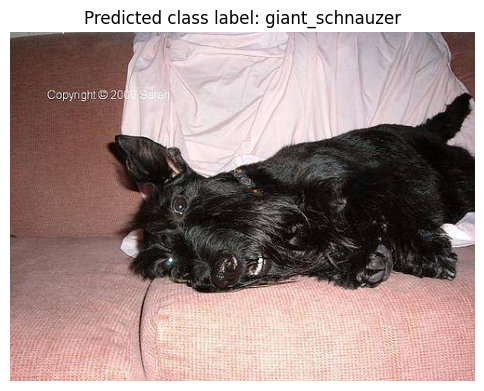

In [34]:
# Get a list of test images
test_images = os.listdir(test_dir)

# Randomly select 5 images
selected_images = random.sample(test_images, 5)

# Perform predictions on each selected image
for image_file in selected_images:
    # Load the image
    image_path = os.path.join(test_dir, image_file)
    image = Image.open(image_path)
    
    # Apply the transformation
    input_image = effnetb0_transforms(image).unsqueeze(0)
    
    # Perform inference
    with torch.no_grad():
        output = effnetb0(input_image)
    
    # Get the predicted class
    predicted_class = torch.argmax(output).item()
    
    # Display the image along with its predicted class label
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Predicted class label: {dataset.classes[predicted_class]}")
    plt.axis('off')
    plt.show()

## Conclusion


We started with downloading the dataset creating the model and finding out the predictions using the model. We can optimize different hyper parameters in order to tune this model for a higher accuracy. This model can be used to predict different breeds of dogs which can be further used by different NGO's working on saving animals and for educational purposes also.